## Dataset initialization

In [1]:
import pandas as pd

#import data sets
df0=pd.read_csv('genomic.csv',sep='\t').set_index('Unnamed: 0').T
df1=pd.read_csv('methylation.csv',sep='\t').set_index('Unnamed: 0').T
df2=pd.read_csv('miRNA.csv',sep='\t').set_index('Unnamed: 0').T
df3=pd.read_csv('protein.csv',sep='\t').set_index('Unnamed: 0').T


In [2]:
df0.shape, df1.shape, df2.shape, df3.shape

((291, 1020), (61, 867), (309, 721), (171, 757))

## Preprocessing

### 1. Data Integration

In [3]:
df=pd.concat([df0, df1, df2, df3]).T

In [4]:
df.shape

(1183, 832)

In [5]:
label=df['Subtype']

In [6]:
label

,Subtype,Subtype,Subtype,Subtype
Unnamed: 0,,,,
TCGA-BP-4162-01,0.0,NaN,NaN,NaN
TCGA-CJ-5677-11,0.0,NaN,0.0,NaN
TCGA-DV-5566-01,0.0,0.0,0.0,0.0
TCGA-BP-5191-01,0.0,0.0,NaN,0.0
TCGA-BP-5200-01,0.0,0.0,NaN,0.0
...,...,...,...,...
TCGA-A4-7732-11,NaN,1.0,NaN,NaN
TCGA-A4-7585-11,NaN,1.0,NaN,NaN
TCGA-A4-A5Y1-11,NaN,NaN,1.0,NaN


In [7]:
df=df.drop(['Subtype'], axis=1)

In [8]:
df.shape

(1183, 828)

In [9]:
label_a=label.iloc[:,[0]]

In [10]:
label_a

,Subtype
Unnamed: 0,
TCGA-BP-4162-01,0.0
TCGA-CJ-5677-11,0.0
TCGA-DV-5566-01,0.0
TCGA-BP-5191-01,0.0
TCGA-BP-5200-01,0.0
...,...
TCGA-A4-7732-11,NaN
TCGA-A4-7585-11,NaN
TCGA-A4-A5Y1-11,NaN


In [11]:
label_a.isnull().sum()

Subtype    163
dtype: int64

In [12]:
label_b=label.iloc[:,[1]]

In [13]:
label_c=label.iloc[:,[2]]

In [14]:
label_d=label.iloc[:,[3]]

In [15]:
label_a['Subtype'] = label_a['Subtype'].fillna(label_b['Subtype'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_17172\477130424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_a['Subtype'] = label_a['Subtype'].fillna(label_b['Subtype'])


In [16]:
label_a.isnull().sum()

Subtype    3
dtype: int64

In [17]:
label_a['Subtype'] = label_a['Subtype'].fillna(label_c['Subtype'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_17172\941420977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_a['Subtype'] = label_a['Subtype'].fillna(label_c['Subtype'])


In [18]:
label_a.isnull().sum()

Subtype    2
dtype: int64

In [19]:
label_a['Subtype'] = label_a['Subtype'].fillna(label_d['Subtype'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_17172\964960565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_a['Subtype'] = label_a['Subtype'].fillna(label_d['Subtype'])


In [20]:
label_a.isnull().sum()

Subtype    0
dtype: int64

In [21]:
df['Subtype']=label_a['Subtype']

In [22]:
df

,RHBDD2,MPI,IL18R1,ARNT,PHF7,C6orf150,TTC27,SPHK2,SLC25A26,PNCK,...,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C,Subtype
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-BP-4162-01,10.7023,10.1549,7.4466,10.3299,4.9930,6.1074,8.7442,7.8615,8.1425,8.2140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
TCGA-CJ-5677-11,11.1547,9.6382,6.4649,10.5242,5.7872,4.9123,8.3176,9.6421,8.4646,1.9676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
TCGA-DV-5566-01,11.1627,11.1023,8.7830,9.8761,4.7292,6.0847,8.5690,8.1878,7.7083,5.4886,...,-0.111725,-0.032286,-0.040738,0.156872,-0.035060,0.125141,-0.258801,0.338766,-0.247438,0.0
TCGA-BP-5191-01,11.2398,11.1530,8.5961,10.1723,5.4504,5.0699,8.5411,7.4039,7.6929,8.0036,...,-0.118774,0.121318,-0.121445,0.101740,0.112219,-0.013924,-0.958410,0.401281,0.215692,0.0
TCGA-BP-5200-01,10.3478,9.2373,8.3455,10.4199,5.5039,6.1064,9.1813,7.6040,7.7859,10.8164,...,-0.158658,-0.111396,-0.154295,0.336304,-0.107209,-0.147531,0.554614,0.260955,0.080711,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-A4-7732-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
TCGA-A4-7585-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
TCGA-A4-A5Y1-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### 2. Data Cleaning

In [23]:
# number of duplicates
df.duplicated().sum()

0

In [24]:
# Check the null values
df.isnull().sum()

RHBDD2             163
MPI                163
IL18R1             163
ARNT               163
PHF7               163
                  ... 
Jak2-R-V           426
p16_INK4a-R-V      426
SHP-2_pY542-R-C    426
CDK1_pY15-R-C      426
Subtype              0
Length: 829, dtype: int64

In [25]:
df.isnull().sum().sort_values(ascending = False)

MIMAT0000737    482
MIMAT0004555    481
MIMAT0004814    481
MIMAT0004921    481
MIMAT0004749    480
               ... 
TMEM8B          163
DDR1            163
ABLIM3          163
FYN             163
Subtype           0
Length: 829, dtype: int64

In [26]:
# check how much of patients in each subtype
df['Subtype'].value_counts()

Subtype
0.0    745
1.0    347
2.0     91
Name: count, dtype: int64

In [27]:
# get the transpose to remove patients who have not enough features 
dfa=df.T

In [28]:
dfa.isnull().sum().sort_values(ascending = False)

Unnamed: 0
TCGA-BP-5181-11    768
TCGA-CZ-5459-11    768
TCGA-BP-5196-11    768
TCGA-BP-5183-11    768
TCGA-BP-5185-11    768
                  ... 
TCGA-2Z-A9JO-01      0
TCGA-UZ-A9PL-01      0
TCGA-SX-A7SP-01      0
TCGA-5P-A9KE-01      0
TCGA-HE-7128-01      0
Length: 1183, dtype: int64

In [29]:
# Count the null values containing features
n=(dfa.isnull().sum()>300).sum()
n

464

In [30]:
# null values in ascending order
dfa.isnull().sum().sort_values(ascending = False).head(n)

Unnamed: 0
TCGA-BP-5181-11    768
TCGA-CZ-5459-11    768
TCGA-BP-5196-11    768
TCGA-BP-5183-11    768
TCGA-BP-5185-11    768
                  ... 
TCGA-B0-5107-01    308
TCGA-B0-5094-01    308
TCGA-BP-5175-01    308
TCGA-BP-5174-01    308
TCGA-B0-5106-01    308
Length: 464, dtype: int64

In [31]:
# List of features which contains more than 300 reccords of null values
nonConsiderablePatients=dfa.isnull().sum().sort_values(ascending = False).head(n).index

In [32]:
# drop high correlated features  
dfa= dfa.drop(nonConsiderablePatients, axis=1)

In [33]:
df=dfa.T

In [34]:
# check affect for patients in each subtype
df['Subtype'].value_counts()

Subtype
1.0    319
0.0    311
2.0     89
Name: count, dtype: int64

In [35]:
df.isnull().sum()

RHBDD2               1
MPI                  1
IL18R1               1
ARNT                 1
PHF7                 1
                  ... 
Jak2-R-V           219
p16_INK4a-R-V      219
SHP-2_pY542-R-C    219
CDK1_pY15-R-C      219
Subtype              0
Length: 829, dtype: int64

In [36]:
# Check the null values
df.isnull().sum().sort_values(ascending = False)

p70S6K_pT389-R-V          219
IGF1R_pY1135_Y1136-R-V    219
SHP-2_pY542-R-C           219
mTOR_pS2448-R-C           219
p16_INK4a-R-V             219
                         ... 
MIMAT0002876                0
MIMAT0002871                0
MIMAT0002872                0
MIMAT0005825                0
Subtype                     0
Length: 829, dtype: int64

In [37]:
# Count the null values containing features more than 10
n=(df.isnull().sum()>10).sum()
n

256

In [38]:
df.isnull().sum().sort_values(ascending = False).head(n)

p70S6K_pT389-R-V          219
IGF1R_pY1135_Y1136-R-V    219
SHP-2_pY542-R-C           219
mTOR_pS2448-R-C           219
p16_INK4a-R-V             219
                         ... 
MIMAT0004951               12
MIMAT0004819               12
MIMAT0006790               12
MIMAT0019927               12
MIMAT0000765               11
Length: 256, dtype: int64

In [39]:
# List of features which contains more than 10 reccords of null values
nullFeatures=df.isnull().sum().sort_values(ascending = False).head(n).index

In [40]:
# drop features which have more null values  
df= df.drop(nullFeatures, axis=1)

In [41]:
df

,RHBDD2,MPI,IL18R1,ARNT,PHF7,C6orf150,TTC27,SPHK2,SLC25A26,PNCK,...,MIMAT0004672,MIMAT0025848,MIMAT0004589,MIMAT0004588,MIMAT0004585,MIMAT0004584,MIMAT0004586,MIMAT0003298,MIMAT0017950,Subtype
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-CJ-5677-11,11.1547,9.6382,6.4649,10.5242,5.7872,4.9123,8.3176,9.6421,8.4646,1.9676,...,5.888767,1.597446,3.772212,4.572534,5.732577,5.588137,3.103999,1.820764,2.014023,0.0
TCGA-DV-5566-01,11.1627,11.1023,8.7830,9.8761,4.7292,6.0847,8.5690,8.1878,7.7083,5.4886,...,7.974370,2.538657,2.912411,5.315757,6.913859,6.012793,5.144128,2.357108,3.584439,0.0
TCGA-BP-4770-01,11.6968,10.6997,6.7179,11.0735,4.8411,6.8345,8.7687,8.1480,8.6299,6.2105,...,7.865401,2.965808,NaN,4.029286,7.425229,6.564837,3.626918,3.066958,2.314399,0.0
TCGA-B0-5696-11,11.1896,9.9579,5.6440,10.4559,6.4592,3.9728,8.4383,9.9574,8.9493,3.1308,...,5.742204,1.894211,4.112828,4.387111,5.252929,5.336151,3.120679,1.894050,0.930343,0.0
TCGA-CJ-4887-01,11.3564,11.2841,8.2675,10.0420,5.8533,5.7853,8.4939,8.2063,7.9860,11.9505,...,7.746573,2.059027,2.355290,4.431934,6.021754,5.285518,3.517366,2.441931,1.369263,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-KM-8443-01,12.3828,9.5249,1.6204,8.4252,7.8484,0.5007,7.1880,10.1381,9.6681,4.8687,...,6.941236,0.612974,4.546392,2.313344,3.844714,6.181857,3.804264,2.852081,0.482372,2.0
TCGA-KM-8442-01,11.4283,9.6452,3.4300,8.7157,7.2611,3.8226,7.4426,9.0326,9.1427,5.7710,...,7.523361,0.481061,5.108858,4.413817,5.017791,5.877302,3.298455,2.189626,1.440993,2.0
TCGA-KL-8332-11,11.5641,10.5319,6.4413,9.7850,6.8616,4.3373,8.5912,9.8132,9.5073,2.0051,...,5.119446,0.815846,2.589448,4.045461,4.872187,5.445662,2.660585,1.244184,0.935332,2.0


In [42]:
df.shape

(719, 573)

In [43]:
# fill null values by mean
df=df.fillna(df.mean())

In [44]:
df.isnull().sum()

RHBDD2          0
MPI             0
IL18R1          0
ARNT            0
PHF7            0
               ..
MIMAT0004584    0
MIMAT0004586    0
MIMAT0003298    0
MIMAT0017950    0
Subtype         0
Length: 573, dtype: int64

In [45]:
# check for zero values
print('Count of zeros')
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if(count>0):
        print('\t', column_name, ' : ', count)

Count of zeros
	 IL18R1  :  1
	 C6orf150  :  1
	 PNCK  :  15
	 DIRC3  :  13
	 ARHGAP8  :  1
	 FAM186B  :  1
	 FOXL1  :  6
	 CXorf57  :  1
	 CAMK4  :  11
	 LMTK3  :  2
	 NMUR1  :  1
	 C5orf36  :  1
	 KLC3  :  1
	 BIK  :  5
	 C19orf26  :  13
	 ALPK2  :  8
	 C22orf45  :  8
	 GPR85  :  1
	 FBXO2  :  1
	 BCO2  :  1
	 DOK7  :  7
	 DIRAS2  :  2
	 RBMS3  :  1
	 C15orf59  :  3
	 HAGHL  :  1
	 KCNK3  :  4
	 SLC2A5  :  2
	 C19orf73  :  5
	 TMEM26  :  2
	 ENPP3  :  9
	 C1orf53  :  1
	 SYNGR3  :  1
	 FAM155B  :  3
	 CYP2J2  :  17
	 CP  :  7
	 Subtype  :  311


In [46]:
# check min max valus for understand the distribution
df.describe()

,RHBDD2,MPI,IL18R1,ARNT,PHF7,C6orf150,TTC27,SPHK2,SLC25A26,PNCK,...,MIMAT0004672,MIMAT0025848,MIMAT0004589,MIMAT0004588,MIMAT0004585,MIMAT0004584,MIMAT0004586,MIMAT0003298,MIMAT0017950,Subtype
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,...,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,11.303513,9.929650,6.406863,10.083518,6.030384,4.857694,8.419164,8.700577,8.671537,5.574269,...,7.013895,1.624020,2.547007,3.778401,5.387792,4.917655,3.395682,1.750965,1.589804,0.691238
std,0.759032,0.684615,1.545412,0.531206,0.826030,1.267236,0.527320,0.838418,0.591991,3.647527,...,0.876589,0.625010,1.070664,0.718832,0.967108,0.918023,0.974198,0.840097,0.709584,0.679438
min,7.676300,7.452300,0.000000,7.865900,3.361400,0.000000,6.268000,2.671400,6.889700,0.000000,...,4.139830,0.207500,0.279500,0.753800,2.584810,0.929298,0.821400,0.162700,0.163500,0.000000
25%,10.808650,9.437050,5.629750,9.895000,5.481400,4.074350,8.205100,8.123100,8.233850,2.781000,...,6.512973,1.177583,1.813721,3.311101,4.723367,4.448355,2.703913,1.137487,1.078166,0.000000
50%,11.354600,9.876500,6.635300,10.193700,5.991100,4.909500,8.485100,8.676900,8.683900,4.621300,...,7.133463,1.617372,2.433817,3.846314,5.425299,5.066575,3.308611,1.631790,1.536892,1.000000
75%,11.798050,10.395750,7.502600,10.423400,6.499000,5.817850,8.752500,9.274200,9.051450,8.144100,...,7.626978,2.057574,3.182690,4.323578,6.011979,5.523194,3.988153,2.247397,2.029877,1.000000
max,13.643200,12.364200,10.339600,11.216800,8.704400,7.956100,10.591200,10.854400,11.072200,14.266700,...,9.601243,3.653503,6.226002,5.826352,8.159555,7.337233,6.655354,4.485311,5.092007,2.000000


In [47]:
# temp set for store features which have more than 5 zero values
tset=set()

In [48]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if(count>5 and column_name!='Subtype'):
        tset.add(column_name)

In [49]:
len(tset)

11

In [50]:
# drop more zero values containing features
df=df.drop(tset,axis=1)

### 3. Feature Selection - Pearson correlation coefficient

In [51]:
df.shape

(719, 562)

In [52]:
#  use Pearson correlation coefficient to find the best features
cor = df.corr(method='pearson')
cor

,RHBDD2,MPI,IL18R1,ARNT,PHF7,C6orf150,TTC27,SPHK2,SLC25A26,ABTB2,...,MIMAT0004672,MIMAT0025848,MIMAT0004589,MIMAT0004588,MIMAT0004585,MIMAT0004584,MIMAT0004586,MIMAT0003298,MIMAT0017950,Subtype
RHBDD2,1.000000,-0.313561,-0.381674,-0.414082,0.457613,-0.550983,-0.459739,0.561031,0.593353,0.418830,...,-0.082796,-0.291813,0.279432,-0.139883,-0.375300,0.032184,-0.137915,-0.266116,-0.152266,0.521815
MPI,-0.313561,1.000000,0.330266,0.202835,-0.337546,0.248556,0.298907,-0.193317,-0.335859,-0.409544,...,0.168849,0.389861,-0.255877,0.158554,0.342481,-0.024023,0.156126,0.285576,0.256459,-0.530426
IL18R1,-0.381674,0.330266,1.000000,0.468337,-0.593153,0.616802,0.522893,-0.495382,-0.532284,-0.483753,...,0.235325,0.255029,-0.605810,0.156353,0.250490,-0.247848,-0.004331,0.057388,0.294235,-0.578568
ARNT,-0.414082,0.202835,0.468337,1.000000,-0.517889,0.520001,0.586863,-0.300574,-0.463280,-0.408707,...,-0.106512,0.252230,-0.474690,0.279115,0.228916,-0.149190,-0.177984,-0.108902,0.205337,-0.578573
PHF7,0.457613,-0.337546,-0.593153,-0.517889,1.000000,-0.573538,-0.613042,0.465998,0.567899,0.455331,...,-0.180819,-0.324386,0.528415,-0.114458,-0.422519,0.168806,-0.041968,-0.145867,-0.301629,0.588954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MIMAT0004584,0.032184,-0.024023,-0.247848,-0.149190,0.168806,-0.070008,-0.157699,0.148942,0.094738,0.206829,...,0.239883,0.212848,0.380908,0.080668,0.438840,1.000000,0.301028,0.461062,-0.056825,0.166727
MIMAT0004586,-0.137915,0.156126,-0.004331,-0.177984,-0.041968,0.155344,-0.006110,-0.116167,-0.086711,-0.107259,...,0.534893,0.206019,0.054596,-0.063033,0.469119,0.301028,1.000000,0.422097,0.302732,0.064723
MIMAT0003298,-0.266116,0.285576,0.057388,-0.108902,-0.145867,0.259441,0.030710,-0.256961,-0.277492,-0.092701,...,0.373386,0.228539,0.098395,-0.043776,0.535604,0.461062,0.422097,1.000000,0.140916,-0.144934
MIMAT0017950,-0.152266,0.256459,0.294235,0.205337,-0.301629,0.265304,0.270086,-0.240935,-0.199133,-0.324966,...,0.275882,0.206333,-0.260147,0.140441,0.348700,-0.056825,0.302732,0.140916,1.000000,-0.239948


In [53]:
c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
high_cor = c1[c1.values!=1]    
high_cor[high_cor>0.8]

MIMAT0004601  MIMAT0000435    0.898490
MIMAT0000436  MIMAT0001631    0.892085
MIMAT0000258  MIMAT0002821    0.890716
MIMAT0004926  MIMAT0004927    0.887099
MIMAT0000682  MIMAT0001620    0.882258
MIMAT0000279  MIMAT0004569    0.880021
MIMAT0000074  MIMAT0000073    0.877880
MIMAT0003338  MIMAT0002888    0.877731
MIMAT0004556  MIMAT0000254    0.874994
MIMAT0000279  MIMAT0000278    0.874743
MIMAT0000731  MIMAT0000732    0.872306
MIMAT0004601  MIMAT0004599    0.870237
MIMAT0000097  MIMAT0004603    0.864864
MIMAT0001635  MIMAT0000281    0.860373
MIMAT0004599  MIMAT0000444    0.858737
MIMAT0001341  MIMAT0002874    0.858166
MIMAT0001545  MIMAT0003389    0.857694
MIMAT0000707  MIMAT0001413    0.852373
MIMAT0000062  MIMAT0000067    0.846201
MIMAT0004694  MIMAT0000753    0.844572
MIMAT0000070  MIMAT0000075    0.838216
MIMAT0017982  MIMAT0004809    0.837312
MIMAT0000278  MIMAT0004569    0.836136
MIMAT0004599  MIMAT0000435    0.831813
MIMAT0000731  MIMAT0016847    0.831598
MIMAT0000064  MIMAT000009

In [54]:
# MultiIndex into temp file
temp= high_cor[high_cor>0.8].index

In [55]:
# temp set for store features which are high correlated
tset=set()

In [56]:
for i in range(temp.size):
    tset.add(temp[i][0])

In [57]:
len(tset)

29

In [58]:
tset

{'MIMAT0000062',
 'MIMAT0000064',
 'MIMAT0000070',
 'MIMAT0000074',
 'MIMAT0000097',
 'MIMAT0000103',
 'MIMAT0000258',
 'MIMAT0000278',
 'MIMAT0000279',
 'MIMAT0000436',
 'MIMAT0000456',
 'MIMAT0000682',
 'MIMAT0000707',
 'MIMAT0000731',
 'MIMAT0000732',
 'MIMAT0000753',
 'MIMAT0001341',
 'MIMAT0001545',
 'MIMAT0001635',
 'MIMAT0003338',
 'MIMAT0004494',
 'MIMAT0004556',
 'MIMAT0004599',
 'MIMAT0004601',
 'MIMAT0004694',
 'MIMAT0004773',
 'MIMAT0004775',
 'MIMAT0004926',
 'MIMAT0017982'}

In [59]:
# drop high correlated features  
df= df.drop(tset,axis=1)

In [60]:
df.shape

(719, 533)

In [61]:
cor = df.corr(method='pearson')

In [62]:
#correlation of variables with the target variable
cor_target = abs(cor["Subtype"])
cor_target

RHBDD2          0.521815
MPI             0.530426
IL18R1          0.578568
ARNT            0.578573
PHF7            0.588954
                  ...   
MIMAT0004584    0.166727
MIMAT0004586    0.064723
MIMAT0003298    0.144934
MIMAT0017950    0.239948
Subtype         1.000000
Name: Subtype, Length: 533, dtype: float64

In [63]:
#first 100 features with high correlation
high_cor_100=cor_target.iloc[cor_target.argsort()[-101:-1]]
high_cor_100

SCAMP4     0.600280
SSR1       0.601012
WDFY1      0.601075
LPCAT1     0.601283
COQ10A     0.601313
             ...   
FAM155B    0.680464
MAEA       0.685783
PLEKHA2    0.697017
CDK19      0.702017
BNIP3L     0.722590
Name: Subtype, Length: 100, dtype: float64

In [64]:
# select 100 features
selected_100_x = df[high_cor_100.index]
selected_100_x.shape

(719, 100)

In [65]:
#first 50 features with high correlation
high_cor_50=cor_target.iloc[cor_target.argsort()[-51:-1]]

# select 50 features
selected_50_x = df[high_cor_50.index]
selected_50_x.shape

(719, 50)

In [66]:
#first 20 features with high correlation
high_cor_20=cor_target.iloc[cor_target.argsort()[-21:-1]]

# select 20 features
selected_20_x = df[high_cor_20.index]
selected_20_x.shape

(719, 20)

### 4.Dataset balancing

In [67]:
df['Subtype'].value_counts()

Subtype
1.0    319
0.0    311
2.0     89
Name: count, dtype: int64

- Dataset is unbalance

#### Oversampling amd undersampling

In [99]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Resampling the minority class.
ros = RandomOverSampler(sampling_strategy={2: 130}, random_state=42)

# Resampling the majority classes.
rus = RandomUnderSampler(sampling_strategy={0: 130,1:130}, random_state=42)

In [100]:
Y=df['Subtype']

In [101]:
x=df.drop(['Subtype'], axis=1)

In [102]:
# Fit the model to generate the data with all features dataset
oversampled_X, oversampled_Y = ros.fit_resample(x, Y)
sampled_X, sampled_Y = rus.fit_resample(oversampled_X, oversampled_Y)

In [103]:
# Fit the model to generate the data with 100 features dataset
oversampled_X_100, oversampled_Y = ros.fit_resample(selected_100_x, Y)
sampled_X_100, sampled_Y = rus.fit_resample(oversampled_X_100, oversampled_Y)

In [104]:
# Fit the model to generate the data with 50 features dataset
oversampled_X_50, oversampled_Y = ros.fit_resample(selected_50_x, Y)
sampled_X_50, sampled_Y = rus.fit_resample(oversampled_X_50, oversampled_Y)

In [105]:
# Fit the model to generate the data with 20 features dataset
oversampled_X_20, oversampled_Y = ros.fit_resample(selected_20_x, Y)
sampled_X_20, sampled_Y = rus.fit_resample(oversampled_X_20, oversampled_Y)

In [106]:
sampled_Y.value_counts()

Subtype
0.0    130
1.0    130
2.0    130
Name: count, dtype: int64

- balanced dataset

### 5. Feature Scaling

In [107]:
sampled_X.min(axis=0)

RHBDD2          8.169400
MPI             7.452300
IL18R1          0.000000
ARNT            7.865900
PHF7            3.361400
                  ...   
MIMAT0004585    2.793139
MIMAT0004584    0.929298
MIMAT0004586    0.821400
MIMAT0003298    0.228743
MIMAT0017950    0.191000
Length: 532, dtype: float64

In [108]:
sampled_X.max(axis=0)

RHBDD2          13.643200
MPI             12.364200
IL18R1          10.339600
ARNT            11.186300
PHF7             8.704400
                  ...    
MIMAT0004585     8.085410
MIMAT0004584     6.916900
MIMAT0004586     6.655354
MIMAT0003298     4.432202
MIMAT0017950     5.092007
Length: 532, dtype: float64

## Test SVM model

In [109]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

#### Check the kernels in SVM 

In [110]:
acc = cross_val_score(svm.SVC(random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with rbf kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with rbf kernel: 0.95 (+/- 0.03)


In [111]:
acc = cross_val_score(svm.SVC(kernel='poly',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with poly kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with poly kernel: 0.98 (+/- 0.03)


In [112]:
acc = cross_val_score(svm.SVC(kernel='linear',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with linear kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with linear kernel: 0.98 (+/- 0.03)


In [113]:
acc = cross_val_score(svm.SVC(kernel='sigmoid',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with sigmoid kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with sigmoid kernel: 0.61 (+/- 0.07)


- poli, linear performed well

#### Check the feature scaling method to SVM

In [114]:
svc=svm.SVC(kernel='poly', random_state=0)

In [115]:
acc = cross_val_score(svc, sampled_X, sampled_Y, cv=5)
print("Accuracy SVM (poly) without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM (poly) without transformation: 0.98 (+/- 0.03)


In [116]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [117]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                   ('model',svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM (poly) with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM (poly) with Standardization: 0.82 (+/- 0.10)


In [118]:
# create pipeline - > Normalizaton
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()),
                   ('model', svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM (poly) with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM (poly) with Normalizaton: 0.98 (+/- 0.03)


- For poly kernel no transformation need

In [119]:
svc=svm.SVC(kernel='linear', random_state=0)

In [162]:
acc = cross_val_score(svc, sampled_X, sampled_Y, cv=5)
print("Accuracy SVM (linear) without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM (linear) without transformation: 0.98 (+/- 0.03)


In [163]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                   ('model',svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM (linear) with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM (linear) with Standardization: 0.98 (+/- 0.03)


In [123]:
# create pipeline - > Normalizaton
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()),
                   ('model', svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM (linear) with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM (linear) with Normalizaton: 0.98 (+/- 0.03)


- For linear no transformation need

considering linear and poly, linear can be choose as it shows better accuracy with all transformations

#### Feaure scaling with stadardization and evaluation

In [124]:
svc=svm.SVC(kernel='linear', random_state=0)

In [125]:
# perform cross validation -> best 20 features 
acc = cross_val_score(svc, sampled_X_20, sampled_Y, cv=5)
print("Accuracy SVM using best 20 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 20 features: 0.89 (+/- 0.05)


In [126]:
# perform cross validation -> best 50 features 
acc = cross_val_score(svc, sampled_X_50, sampled_Y, cv=5)
print("Accuracy SVM using best 50 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 50 features: 0.92 (+/- 0.06)


In [127]:
# perform cross validation -> best 100 features 
acc = cross_val_score(svc, sampled_X_100, sampled_Y, cv=5)
print("Accuracy SVM using best 100 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 100 features: 0.94 (+/- 0.04)


#### Select best 120 features, data balancing, splitting, scalling and evaluating

In [128]:
#first 120 atures with high correlation
high_cor_120=cor_target.iloc[cor_target.argsort()[-121:-1]]

# select 120 features
selected_120_x = df[high_cor_120.index]
selected_120_x.shape

(719, 120)

In [129]:
# Fit the model to generate the data with 120 features dataset
oversampled_X_120, oversampled_Y = ros.fit_resample(selected_120_x, Y)
sampled_X_120, sampled_Y = rus.fit_resample(oversampled_X_120, oversampled_Y)

In [130]:
# perform cross validation -> best 120 features 
acc = cross_val_score(svc, sampled_X_120, sampled_Y, cv=5)
print("Accuracy SVM using best 120 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 120 features: 0.95 (+/- 0.05)


#### Select best 140 features, data balancing, splitting, scalling and evaluating

In [131]:
#first 140 atures with high correlation
high_cor_140=cor_target.iloc[cor_target.argsort()[-141:-1]]

# select 140 features
selected_140_x = df[high_cor_140.index]
selected_140_x.shape

(719, 140)

In [132]:
# Fit the model to generate the data with 140 features dataset
oversampled_X_140, oversampled_Y = ros.fit_resample(selected_140_x, Y)
sampled_X_140, sampled_Y = rus.fit_resample(oversampled_X_140, oversampled_Y)

In [133]:
# perform cross validation -> best 140 features 
acc = cross_val_score(svc, sampled_X_140, sampled_Y, cv=5)
print("Accuracy SVM using best 140 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 140 features: 0.95 (+/- 0.05)


#### Select best 150 features, data balancing, splitting, training and evaluating

In [134]:
#first 150 atures with high correlation
high_cor_150=cor_target.iloc[cor_target.argsort()[-151:-1]]

# select 150 features
selected_150_x = df[high_cor_150.index]
selected_150_x.shape

(719, 150)

In [135]:
# Fit the model to generate the data with 150 features dataset
oversampled_X_150, oversampled_Y = ros.fit_resample(selected_150_x, Y)
sampled_X_150, sampled_Y = rus.fit_resample(oversampled_X_150, oversampled_Y)

In [136]:
# perform cross validation -> best 150 features 
acc = cross_val_score(svc, sampled_X_150, sampled_Y, cv=5)
print("Accuracy SVM using best 150 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 150 features: 0.94 (+/- 0.04)


#### Select best 200 features, data balancing, splitting, training and evaluating

In [137]:
#first 200 features with high correlation
high_cor_200=cor_target.iloc[cor_target.argsort()[-201:-1]]

# select 200 features
selected_200_x = df[high_cor_200.index]
selected_200_x.shape


# Fit the model to generate the data with 200 features dataset
oversampled_X_200, oversampled_Y = ros.fit_resample(selected_200_x, Y)
sampled_X_200, sampled_Y = rus.fit_resample(oversampled_X_200, oversampled_Y)


acc = cross_val_score(svc, sampled_X_200, sampled_Y, cv=5)
print("Accuracy SVM using best 200 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 200 features: 0.96 (+/- 0.03)


#### Select best 250 features, data balancing, splitting, training and evaluating

In [138]:
#first 250 atures with high correlation
high_cor_250=cor_target.iloc[cor_target.argsort()[-251:-1]]

# select 250 features
selected_250_x = df[high_cor_250.index]
selected_250_x.shape


# Fit the model to generate the data with 250 features dataset
oversampled_X_250, oversampled_Y = ros.fit_resample(selected_250_x, Y)
sampled_X_250, sampled_Y = rus.fit_resample(oversampled_X_250, oversampled_Y)


acc = cross_val_score(svc, sampled_X_250, sampled_Y, cv=5)
print("Accuracy SVM using best 250 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 250 features: 0.97 (+/- 0.04)


#### Select best 280 features, data balancing, splitting, training and evaluating

In [139]:
#first 280 atures with high correlation
high_cor_280=cor_target.iloc[cor_target.argsort()[-281:-1]]

# select 280 features
selected_280_x = df[high_cor_280.index]
selected_280_x.shape


# Fit the model to generate the data with 280 features dataset
oversampled_X_280, oversampled_Y = ros.fit_resample(selected_280_x, Y)
sampled_X_280, sampled_Y = rus.fit_resample(oversampled_X_280, oversampled_Y)


acc = cross_val_score(svc, sampled_X_280, sampled_Y, cv=5)
print("Accuracy SVM using best 280 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 280 features: 0.97 (+/- 0.04)


#### Select best 300 features, data balancing, splitting, training and evaluating

In [140]:
#first 300 atures with high correlation
high_cor_300=cor_target.iloc[cor_target.argsort()[-301:-1]]

# select 300 features
selected_300_x = df[high_cor_300.index]
selected_300_x.shape


# Fit the model to generate the data with 280 features dataset
oversampled_X_300, oversampled_Y = ros.fit_resample(selected_300_x, Y)
sampled_X_300, sampled_Y = rus.fit_resample(oversampled_X_300, oversampled_Y)


acc = cross_val_score(svc, sampled_X_300, sampled_Y, cv=5)
print("Accuracy SVM using best 300 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 300 features: 0.97 (+/- 0.04)


#### Select best 350 features, data balancing, splitting, training and evaluating

In [141]:
#first 350 atures with high correlation
high_cor_350=cor_target.iloc[cor_target.argsort()[-351:-1]]

# select 350 features
selected_350_x = df[high_cor_350.index]

# Fit the model to generate the data with 280 features dataset
oversampled_X_350, oversampled_Y = ros.fit_resample(selected_350_x, Y)
sampled_X_350, sampled_Y = rus.fit_resample(oversampled_X_350, oversampled_Y)


acc = cross_val_score(svc, sampled_X_350, sampled_Y, cv=5)
print("Accuracy SVM using best 350 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 350 features: 0.97 (+/- 0.04)


#### Select best 400 features, data balancing, splitting, training and evaluating

In [142]:
#first 400 atures with high correlation
high_cor_400=cor_target.iloc[cor_target.argsort()[-401:-1]]

# select 350 features
selected_400_x = df[high_cor_400.index]

# Fit the model to generate the data with 280 features dataset
oversampled_X_400, oversampled_Y = ros.fit_resample(selected_400_x, Y)
sampled_X_400, sampled_Y = rus.fit_resample(oversampled_X_400, oversampled_Y)


acc = cross_val_score(svc, sampled_X_400, sampled_Y, cv=5)
print("Accuracy SVM using best 400 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 400 features: 0.98 (+/- 0.03)


#### Select best 380 features, data balancing, splitting, training and evaluating

In [143]:
#first 400 atures with high correlation
high_cor_380=cor_target.iloc[cor_target.argsort()[-381:-1]]

# select 350 features
selected_380_x = df[high_cor_380.index]

# Fit the model to generate the data with 280 features dataset
oversampled_X_380, oversampled_Y = ros.fit_resample(selected_380_x, Y)
sampled_X_380, sampled_Y = rus.fit_resample(oversampled_X_380, oversampled_Y)


acc = cross_val_score(svc, sampled_X_380, sampled_Y, cv=5)
print("Accuracy SVM using best 380 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 380 features: 0.97 (+/- 0.03)


- using best 400 persormed well

## Test RF model

In [144]:
from sklearn.ensemble import RandomForestClassifier

#### RF Parameter optimization

In [145]:
rfc = RandomForestClassifier()

In [146]:
parameters = {
    "n_estimators":[100,500,1000],
    "max_depth":[4,8,16,None],
    "criterion":['gini', 'entropy'],
    "random_state": [0]
}

In [147]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(sampled_X,sampled_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 16, None],
                         'n_estimators': [100, 500, 1000],
                         'random_state': [0]})

In [148]:
print(f'Best parameters are: {cv.best_params_}')

Best parameters are: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 500, 'random_state': 0}


In [149]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= 8, n_estimators= 500,random_state= 0)

In [150]:
acc = cross_val_score(rf, sampled_X, sampled_Y, cv=5)
print("Accuracy RF with best_params: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF with best_params: 0.97 (+/- 0.03)


#### Try for different number of features

In [151]:
acc = cross_val_score(rf, sampled_X_20, sampled_Y, cv=5)
print("Accuracy RF using best 20 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 20 features: 0.91 (+/- 0.04)


In [152]:
acc = cross_val_score(rf, sampled_X_50, sampled_Y, cv=5)
print("Accuracy RF using best 50 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 50 features: 0.95 (+/- 0.04)


In [153]:
acc = cross_val_score(rf, sampled_X_100, sampled_Y, cv=5)
print("Accuracy RF using best 100 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 100 features: 0.95 (+/- 0.03)


In [154]:
acc = cross_val_score(rf, sampled_X_120, sampled_Y, cv=5)
print("Accuracy RF using best 120 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 120 features: 0.95 (+/- 0.03)


In [155]:
acc = cross_val_score(rf, sampled_X_140, sampled_Y, cv=5)
print("Accuracy RF using best 140 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 140 features: 0.94 (+/- 0.03)


In [156]:
# perform cross validation -> best 150 features 
acc = cross_val_score(rf, sampled_X_150, sampled_Y, cv=5)
print("Accuracy RF using best 150 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 150 features: 0.95 (+/- 0.02)


In [157]:
# perform cross validation -> best 200 features 
acc = cross_val_score(rf, sampled_X_200, sampled_Y, cv=5)
print("Accuracy rf using best 200 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy rf using best 200 features: 0.94 (+/- 0.02)


In [158]:
# perform cross validation -> best 250 features 
acc = cross_val_score(rf, sampled_X_250, sampled_Y, cv=5)
print("Accuracy rf using best 250 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy rf using best 250 features: 0.96 (+/- 0.03)


In [159]:
# perform cross validation -> best 300 features 
acc = cross_val_score(rf, sampled_X_300, sampled_Y, cv=5)
print("Accuracy rf using best 300 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy rf using best 300 features: 0.95 (+/- 0.02)


In [165]:
# perform cross validation -> best 350 features 
acc = cross_val_score(rf, sampled_X_350, sampled_Y, cv=5)
print("Accuracy rf using best 350 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy rf using best 350 features: 0.96 (+/- 0.03)


In [166]:
# perform cross validation -> best 400 features 
acc = cross_val_score(rf, sampled_X_400, sampled_Y, cv=5)
print("Accuracy rf using best 400 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy rf using best 400 features: 0.96 (+/- 0.03)


#### Select best 450 features, data balancing, splitting, training and evaluating

In [167]:
#first 450 atures with high correlation
high_cor_450=cor_target.iloc[cor_target.argsort()[-451:-1]]

# select 350 features
selected_450_x = df[high_cor_450.index]

# Fit the model to generate the data with 450 features dataset
oversampled_X_450, oversampled_Y = ros.fit_resample(selected_450_x, Y)
sampled_X_450, sampled_Y = rus.fit_resample(oversampled_X_450, oversampled_Y)


acc = cross_val_score(rf, sampled_X_450, sampled_Y, cv=5)
print("Accuracy rf using best 450 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy rf using best 450 features: 0.97 (+/- 0.03)


## Test KNN model

In [170]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#### Find the best k value for KNN with Standardization 

In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sampled_X_standard = scaler.fit_transform(sampled_X)

Text(0, 0.5, 'Accuracy')

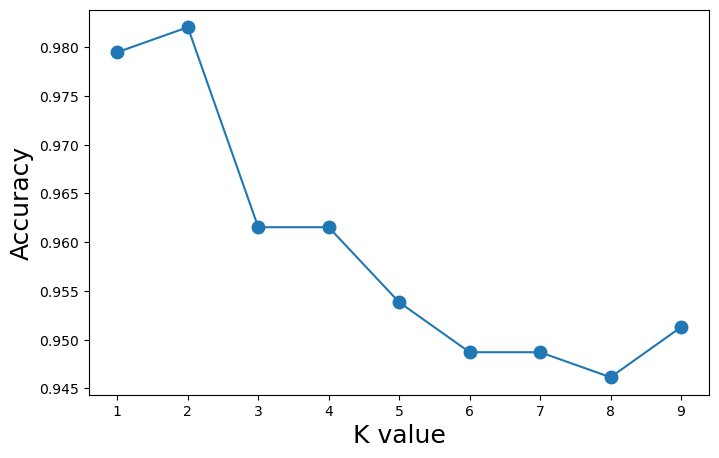

In [176]:
knn_acc = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    acc = cross_val_score(knn, sampled_X_standard, sampled_Y, cv=5)
    knn_acc.append(acc.mean())

plt.figure(figsize=(8,5))
plt.plot(range(1,10),knn_acc, marker='o', markersize=9)
plt.xlabel("K value", fontsize=18)
plt.ylabel("Accuracy",fontsize=18)

In [177]:
knn = KNeighborsClassifier(n_neighbors=2)

In [180]:
acc = cross_val_score(knn, sampled_X_standard, sampled_Y, cv=5)
print("Accuracy KNN with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Standardization: 0.98 (+/- 0.03)


#### Find the best k value for KNN with Normalization 

In [182]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sampled_X_minmax = scaler.fit_transform(sampled_X)

Text(0, 0.5, 'Accuracy')

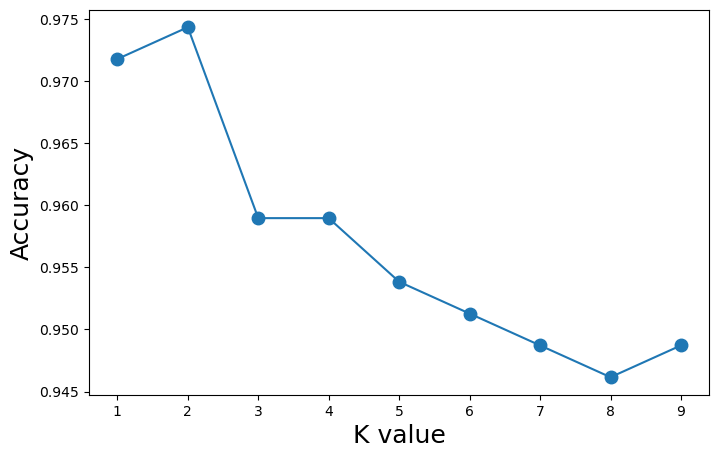

In [183]:
knn_acc = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    acc = cross_val_score(knn, sampled_X_minmax, sampled_Y, cv=5)
    knn_acc.append(acc.mean())

plt.figure(figsize=(8,5))
plt.plot(range(1,10),knn_acc, marker='o', markersize=9)
plt.xlabel("K value", fontsize=18)
plt.ylabel("Accuracy",fontsize=18)

In [184]:
knn = KNeighborsClassifier(n_neighbors=2)

In [185]:
acc = cross_val_score(knn, sampled_X_standard, sampled_Y, cv=5)
print("Accuracy KNN with Normalization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalization: 0.97 (+/- 0.02)


- Standarization with K=2 performed well

#### Try for different number of features

In [188]:
# perform cross validation -> best 20 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_20, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 20 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 20 features: 0.91 (+/- 0.04)


In [189]:
# perform cross validation -> best 50 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_50, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 50 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 50 features: 0.92 (+/- 0.03)


In [191]:
# perform cross validation -> best 100 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_100, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 100 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 100 features: 0.93 (+/- 0.04)


In [192]:
# perform cross validation -> best 120 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_120, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 120 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 120 features: 0.93 (+/- 0.06)


In [194]:
# perform cross validation -> best 140 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_140, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 140 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 140 features: 0.92 (+/- 0.05)


In [195]:
# perform cross validation -> best 150 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_150, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 150 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 150 features: 0.93 (+/- 0.05)


In [196]:
# perform cross validation -> best 200 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_200, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 200 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 200 features: 0.92 (+/- 0.04)


In [197]:
# perform cross validation -> best 250 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_250, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 250 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 250 features: 0.92 (+/- 0.05)


In [210]:
# perform cross validation -> best 280 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_280, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 280 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 280 features: 0.93 (+/- 0.06)


In [199]:
# perform cross validation -> best 300 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_300, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 300 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 300 features: 0.94 (+/- 0.05)


In [200]:
# perform cross validation -> best 350 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_350, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 350 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 350 features: 0.96 (+/- 0.05)


In [209]:
# perform cross validation -> best 380 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_380, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 380 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 380 features: 0.95 (+/- 0.06)


In [201]:
# perform cross validation -> best 400 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_400, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 400 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 400 features: 0.95 (+/- 0.06)


In [202]:
# perform cross validation -> best 450 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_450, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy knn using best 450 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 450 features: 0.96 (+/- 0.05)


#### Select best 500 features, data balancing, splitting, training and evaluating

In [203]:
#first 500 atures with high correlation
high_cor_500=cor_target.iloc[cor_target.argsort()[-501:-1]]

# select 350 features
selected_500_x = df[high_cor_500.index]

# Fit the model to generate the data with 450 features dataset
oversampled_X_500, oversampled_Y = ros.fit_resample(selected_500_x, Y)
sampled_X_500, sampled_Y = rus.fit_resample(oversampled_X_500, oversampled_Y)

In [204]:
# perform cross validation -> best 500 features 
# create pipeline - > Standardization 
pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_500, 
                         y=sampled_Y, 
                         cv=5
                        )


print("Accuracy knn using best 500 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy knn using best 500 features: 0.98 (+/- 0.03)


-----


##### Selected SVM with linear kernal.

Selected Features are impoerted in a csv file

In [192]:
import csv
with open('features.csv', 'w', encoding='UTF8',newline='') as f:
    writer = csv.writer(f)
    
    for i in range(sampled_X_400.shape[1]):
        # write the data
        writer.writerow([sampled_X_400.columns[i]])